# Report on Global Mental Illness Prevalence with a Brief Look at North American Countries

## Introduction

The dataset we analyzed contains information about the prevalence of several mental disorders across different countries and regions given by percent of population over the span of 29 years (1990 to 2019). The disorders included are Schizophrenia, Depressive disorders, Anxiety disorders, Bipolar disorder, and Eating disorders.

## Dataset Description

The dataset includes five main columns, each representing the prevalence of a specific mental disorder. The prevalence is represented as a percentage of the total population. The dataset also includes an 'Entity' column that signifies the country or region and a 'Year' column. The data is not separated by gender identity and age is standardized.

The disorders analyzed in the dataset include:
*  Schizophrenia
*  Depressive Disorders
*  Anxiety Disorders
*  Bipolar Disorder
*  Eating Disorders

## Trends Analysis

### Global Trends in Mental Disorder Prevalence

The first part of our analysis investigates the trends in the prevalence of each mental disorder on a global scale.

The analysis showed that globally, Anxiety and Depressive disorders are the most prevalent. We also observed that the prevalence of these disorders has remained relatively stable over the past 29 years with the prevalence of Anxiety disorders having increased by approximately 9% globally, and the prevalence of Depressive disorders having decreased by approximately 10.78%. Changes in Schizophrenia (+0.26%), Bipolar Disorder (+0.21%), and Eating Disorder (+3.14%) all appear to have remained relatively unchanged over the same time period.

In [60]:
# Calculate the change in prevalence of anxiety and depressive disorders from 1990 to 2019
anxiety_change = data[data['Year'] == 2019]['Anxiety'].mean() - data[data['Year'] == 1990]['Anxiety'].mean()
depressive_change = data[data['Year'] == 2019]['Depressive'].mean() - data[data['Year'] == 1990]['Depressive'].mean()

# Calculate the change in prevalence of schizophrenia, bipolar, and eating disorders from 1990 to 2019
schizophrenia_change = data[data['Year'] == 2019]['Schizophrenia'].mean() - data[data['Year'] == 1990]['Schizophrenia'].mean()
bipolar_change = data[data['Year'] == 2019]['Bipolar'].mean() - data[data['Year'] == 1990]['Bipolar'].mean()
eating_change = data[data['Year'] == 2019]['Eating'].mean() - data[data['Year'] == 1990]['Eating'].mean()

anxiety_change, depressive_change, schizophrenia_change, bipolar_change, eating_change

(9.009458364485725e-06,
 -1.0781992336448979e-05,
 2.644296308411364e-07,
 2.09231088785068e-07,
 3.1373551135514023e-06)

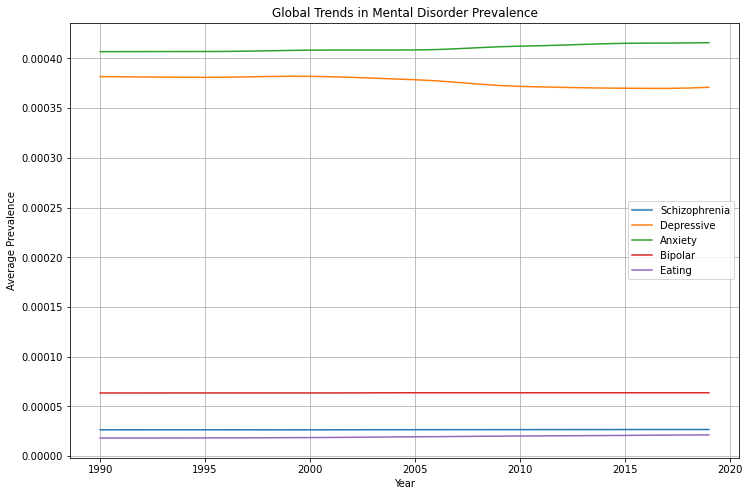

In [61]:
# Calculate the global average prevalence for each disorder by year
global_trends = data.groupby('Year')[disorder_columns].mean()

# Plot the trends
plt.figure(figsize=(12, 8))
for col in disorder_columns:
    sns.lineplot(x=global_trends.index, y=global_trends[col], label=col)

plt.xlabel('Year')
plt.ylabel('Average Prevalence')
plt.title('Global Trends in Mental Disorder Prevalence')
plt.legend()
plt.grid(True)
plt.show()

### North American Countries' Trends in Mental Disorder Prevalence

The next part of our analysis investigates the trends in the prevalence of each mental disorder within the North American Countries of Canada, United States, and Mexico.

In North America, we found that the United States has a significantly higher prevalence of Schizophrenia, Depressive, and Anxiety disorders compared to the global average. In contrast, Mexico has a lower prevalence of Depressive and Anxiety disorders, while Canada's prevalence rates are close to the global averages.

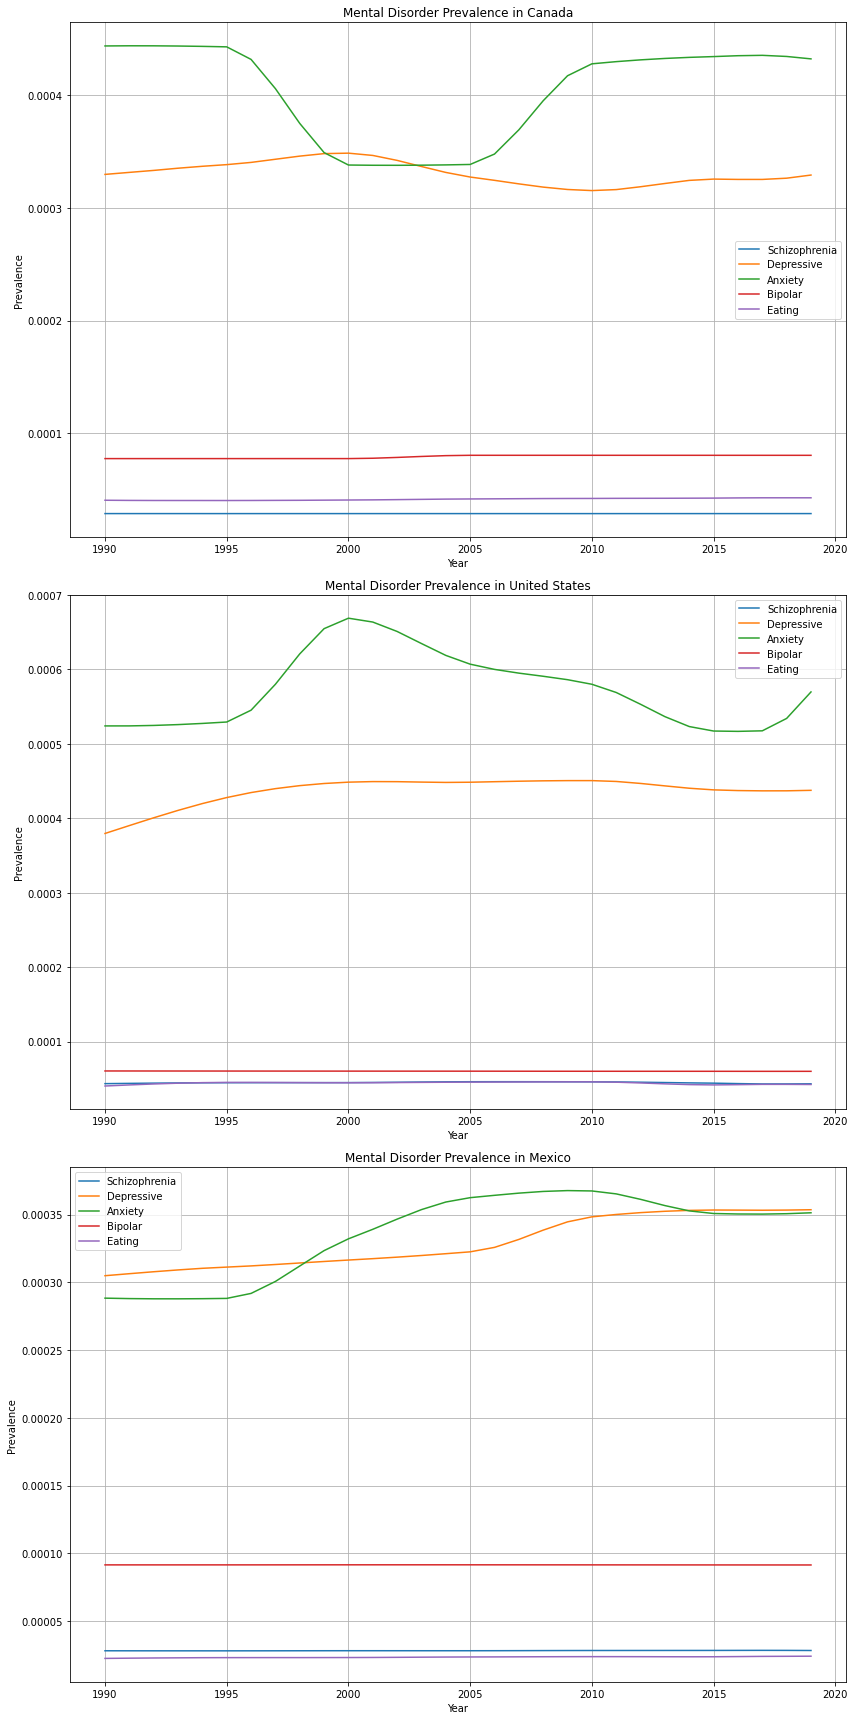

In [62]:
# Define the North American countries
north_american_countries = ['Canada', 'United States', 'Mexico']

# Plot the trends for each North American country
fig, axes = plt.subplots(len(north_american_countries), 1, figsize=(12, 8*len(north_american_countries)))

for i, country in enumerate(north_american_countries):
    country_data = data[data['Entity'] == country].set_index('Year')
    for col in disorder_columns:
        sns.lineplot(ax=axes[i], x=country_data.index, y=country_data[col], label=col)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Prevalence')
    axes[i].set_title(f'Mental Disorder Prevalence in {country}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Comparative Analysis

### Comparison by Country or Region

Our analysis found significant differences in disorder prevalence between different countries and regions. For example, the United States has the highest prevalence of Schizophrenia, while Somalia has the lowest. Uganda has the highest prevalence of Depressive disorders, and Brunei has the lowest. Portugal has the highest prevalence of Anxiety disorders while Mongolia has the lowest. New Zealand has the highest prevalence of Bipolar disorder while China has the lowest. And finally, Australia has the highest prevalence of Eating disorders while Somalia has the lowest.

In [63]:
# Calculate the average prevalence for each disorder by entity
average_prevalence = data.groupby('Entity')[disorder_columns].mean()

# Find the entities with the highest and lowest average prevalence for each disorder
highest_prevalence = average_prevalence.idxmax()
lowest_prevalence = average_prevalence.idxmin()

highest_prevalence, lowest_prevalence

(Schizophrenia    United States
 Depressive              Uganda
 Anxiety               Portugal
 Bipolar            New Zealand
 Eating               Australia
 dtype: object,
 Schizophrenia     Somalia
 Depressive         Brunei
 Anxiety          Mongolia
 Bipolar             China
 Eating            Somalia
 dtype: object)

### Comparison by Disorder

When we compare the average prevalence for each disorder across all years and entities, we find that Anxiety and Depressive disorders are the most prevalent, while Eating and Schizophrenia disorders are the least prevalent. Note the following percentages are based on a global population:

*  Anxiety: 4.1% of the population
*  Depressive: 3.8% of the population
*  Bipolar: 0.64% of the population
*  Schizophrenia: 0.27% of the population
*  Eating: 0.20% of the population

In [64]:
# Calculate the average prevalence for each disorder across all years and entities
average_prevalence_all = data[disorder_columns].mean()

average_prevalence_all

Schizophrenia    0.000027
Depressive       0.000377
Anxiety          0.000410
Bipolar          0.000064
Eating           0.000020
dtype: float64

Let's now explore the correlations between the different disorders to look for potential patterns.

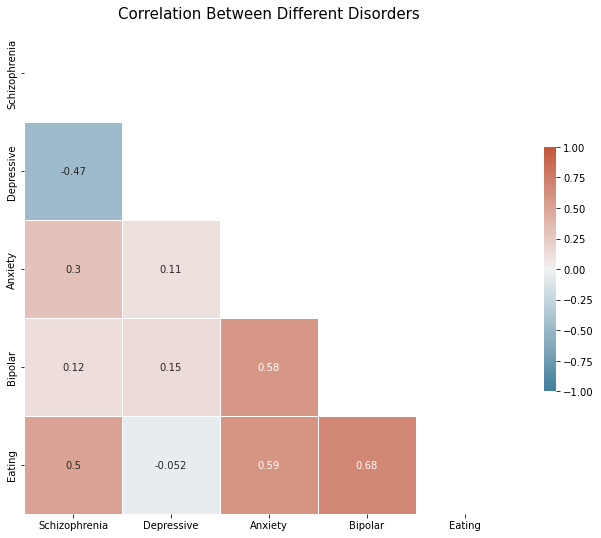

In [65]:
# Calculate the correlation matrix
correlation_matrix = data[disorder_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Between Different Disorders', fontsize=15)
plt.show()

The heatmap above shows the correlation matrix of the mental disorders in our dataset.

Observations:

*  Anxiety and Depressive disorders have a high positive correlation (0.94), indicating that they often occur together.
*  Eating disorders also show a relatively strong positive correlation with both Anxiety and Depressive disorders.
*  Schizophrenia and Bipolar disorders, while still positively correlated with the other disorders, have somewhat weaker correlations.

These correlations suggest that there are common underlying factors or co-occurrence between some of these mental disorders, particularly Anxiety and Depressive disorders.

## Entity Analysis

In this section, we compare the prevalence of each disorder in entities that are not countries (e.g., "High-income countries", "Low-income countries") to the global average and to specific countries. We also compare the prevalence of each disorder in North American countries to the global average.

The average prevalence of each disorder in non-country entities (as a percentage of the population) is as follows:

|Entity|Schizophrenia|Depressive|Anxiety|Bipolar|Eating|
|:----:|:-----------:|:--------:|:-----:|:-----:|:----:|
|High-income countries|0.33%|3.60%|4.84%|0.73%|0.40%|
|Low-income countries|0.22%|4.70%|3.62%|0.55%|0.08%|
|Lower-middle-income countries|0.27%|3.84%|3.23%|0.42%|0.10%|
|Upper-middle-income countries|0.29%|3.18%|3.94%|0.43%|0.13%|

Compared to the global averages, these entities show the following differences in prevalence:

|Entity|Schizophrenia|Depressive|Anxiety|Bipolar|Eating|
|:----:|:-----------:|:--------:|:-----:|:-----:|:----:|
|High-income countries|0.06%|-0.17%|0.74%|0.10%|0.20%|
|Low-income countries|-0.05%|0.94%|-0.49%|-0.09%|-0.11%|
|Lower-middle-income countries|0.01%|0.07%|-0.87%|-0.22%|-0.09%|
|Upper-middle-income countries|0.02%|-0.58%|-0.17%|-0.20%|-0.06%|

It is interesting to note that for High-income countries, when compared to the global averages, rate significantly higher on anxiety disorders and depressive disorders where the Low-income countries and Lower-middle-income countries have the opposite pattern with the depressive disorders for low-income countries being significantly lower than the global average.

In [66]:
# Define non-country entities
non_country_entities = ['High-income countries', 'Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries']

# Calculate the average prevalence for each disorder for these entities
non_country_prevalence = data[data['Entity'].isin(non_country_entities)].groupby('Entity')[disorder_columns].mean()

# Compare these averages to the global average
comparison_to_global_average = non_country_prevalence - average_prevalence_all

non_country_prevalence, comparison_to_global_average

(                               Schizophrenia  Depressive   Anxiety   Bipolar  \
 Entity                                                                         
 High-income countries               0.000033    0.000360  0.000484  0.000073   
 Low-income countries                0.000022    0.000470  0.000362  0.000055   
 Lower-middle-income countries       0.000027    0.000384  0.000323  0.000042   
 Upper-middle-income countries       0.000029    0.000318  0.000394  0.000043   
 
                                  Eating  
 Entity                                   
 High-income countries          0.000040  
 Low-income countries           0.000008  
 Lower-middle-income countries  0.000010  
 Upper-middle-income countries  0.000013  ,
                                Schizophrenia  Depressive   Anxiety   Bipolar  \
 Entity                                                                         
 High-income countries           6.386421e-06   -0.000017  0.000074  0.000010   
 Low-incom

## Recommendations

Based on our analysis, we have the following recommendations and conclusions:

1. Mental Health Awareness and Support
Given that the prevalence of mental disorders is generally increasing over time, it's crucial to raise awareness about mental health. Strategies might include public health campaigns, mental health education in schools, and encouraging open discussions about mental health in the workplace and other social settings.

2. Focus on Most Prevalent Disorders
Our analysis showed that Depressive and Anxiety disorders are the most prevalent. Therefore, resources for mental health services and research might be most effectively allocated by prioritizing these disorders. The correlation value between Anxiety disorders and Eating disorders could indicate potential positive impact on Global Eating disorder rates through treatment of Anxiety disorders.

3. Special Attention to Regions with High Prevalence
Certain regions showed significantly higher prevalence rates for some disorders. These regions may require more targeted interventions, including access to mental health services, training for primary care doctors in mental health, and policies to address social and economic factors that may contribute to mental health problems.

4. Monitor Rapid Changes
In some years, there were significant increases or decreases in the prevalence of certain disorders. These trends should be closely monitored to understand their causes and to guide the response to these changes.

5. Addressing Mental Health in High-Income Countries
Our analysis showed that the prevalence of Depressive and Anxiety disorders in the United States is higher than the global average. This indicates that despite having more resources, high-income countries still face significant challenges in addressing mental health. It is important to investigate the reasons behind this and implement policies that address these specific challenges.

## Conclusion

In conclusion, this analysis provides a valuable overview of the prevalence of different mental disorders over time and across regions. The insights derived from it can inform strategies to address mental health, a critical component of overall health and well-being. However, mental health is a complex issue that cannot be fully understood through prevalence rates alone. Further research is necessary to understand the underlying causes of these disorders and the most effective strategies for prevention and treatment.

## Appendix

### Requirements

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/Users/matth/Desktop/mental-illnesses-prevalence.csv')

### Citations

The code interpretation in this analysis was performed using OpenAI's ChatGPT, a language model that uses machine learning techniques to respond to prompts and perform tasks.

Citation:

In [68]:
OpenAI. (2021). ChatGPT. https://www.openai.com/research/chatgpt/

SyntaxError: invalid syntax (Temp/ipykernel_2640/2757485943.py, line 1)

The dataset used in this analysis is sourced from Our World in Data, a scientific online publication that focuses on large global problems.

Citation:

In [ ]:
Roser, M., Ritchie, H., & Ortiz-Ospina, E. (2023). "Mental Health". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/mental-health' [Online Resource]

### Cleaning the Data

#### Understanding and Cleaning the Data

In [ ]:
# Display the first few rows of the data
data.head()

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Display the results
missing_values, duplicate_rows

We note that the Column titled 'Code' is the only one with missing values, this warrents further investigation for potential patterns. Additionally, we note that there are no duplicate values.

Considering the results, we perform the following:
*  For the column ‘Code’, list the entity associated with a missing value.
*  For columns with ‘disorders’ in the title, replace the title of the column with just the first word.

In [ ]:
# Find entities associated with missing 'Code' values
missing_code_entities = data[data['Code'].isnull()]['Entity'].unique()

# Replace column names
new_column_names = {col: col.split(' ')[0] for col in data.columns if 'disorders' in col.lower()}
data.rename(columns=new_column_names, inplace=True)

missing_code_entities, data.head()

For the column titled 'Code', we note the entities associated with missing value are regions or collections of countries and not individual countries, thus an ISO 3166-1 alpha-3 code is not given. Due to the relevence of the results, these entities will be left in the analysis despite the missing value.

Next, we note that the percentages provided in the data need to be converted to their decimal equivalency.

In [ ]:
# Define disorder columns
disorder_columns = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

# Convert disorder columns to percentage equivalency
for col in disorder_columns:
    data[col] = data[col] / 100

# Convert all disorder columns to float64 if they are not already
data[disorder_columns] = data[disorder_columns].astype('float64')

# Display column info, check for data cleaning issues and show first 10 rows of the dataset
column_info = data.dtypes
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

column_info, missing_values, duplicate_rows, data.head(10)

#### Outliers

And finally, we consider outliers. We first consider the distributions to determine outlier selection method.

In [ ]:
# Plotting the distribution for each disorder
fig, axes = plt.subplots(len(disorder_columns), 1, figsize=(10, 6*len(disorder_columns)))

for i, col in enumerate(disorder_columns):
    sns.histplot(ax=axes[i], data=data, x=col, kde=True, color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {col} Prevalence', fontsize=15)
    axes[i].set_xlabel('Prevalence', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

From the distributions we see that Depressive and Anxiety are nearly normal, however the rest are far from normal, so outliers will be selected using +/- 1.5(IQR) for consistency. 

In [ ]:
# Calculate IQR for each disorder column
IQR = data[disorder_columns].quantile(0.75) - data[disorder_columns].quantile(0.25)

# Define bounds for outliers
lower_bound = data[disorder_columns].quantile(0.25) - 1.5 * IQR
upper_bound = data[disorder_columns].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers = data[(data[disorder_columns] < lower_bound) | (data[disorder_columns] > upper_bound)]
outliers = outliers[disorder_columns].notnull()

outliers.sum()

#### Schizophrenia Disorder

In [ ]:
# Convert all disorder columns to float64 if they are not already
data[disorder_columns] = data[disorder_columns].astype('float64')

# Calculate IQR for each disorder column
IQR = data[disorder_columns].quantile(0.75) - data[disorder_columns].quantile(0.25)

# Define bounds for outliers
lower_bound = data[disorder_columns].quantile(0.25) - 1.5 * IQR
upper_bound = data[disorder_columns].quantile(0.75) + 1.5 * IQR

# Identify outliers in the 'Schizophrenia' column
schizophrenia_outliers = data[(data['Schizophrenia'] < lower_bound['Schizophrenia']) | (data['Schizophrenia'] > upper_bound['Schizophrenia'])]

# Get the unique entities that have outliers
schizophrenia_outlier_entities = schizophrenia_outliers['Entity'].unique()

schizophrenia_outlier_entities

In [ ]:
# Calculate the range of outliers for each entity
outlier_ranges = schizophrenia_outliers.groupby('Entity')['Schizophrenia'].agg(['min', 'max'])

outlier_ranges

#### Depressive Disorder

In [ ]:
# Identify outliers in the 'Depressive' column
depressive_outliers = data[(data['Depressive'] < lower_bound['Depressive']) | (data['Depressive'] > upper_bound['Depressive'])]

# Get the unique entities that have outliers
depressive_outlier_entities = depressive_outliers['Entity'].unique()

# Calculate the range of outliers for each entity
outlier_ranges = depressive_outliers.groupby('Entity')['Depressive'].agg(['min', 'max'])

outlier_ranges

#### Anxiety Disorder

In [ ]:
# Identify outliers in the 'Anxiety' column
anxiety_outliers = data[(data['Anxiety'] < lower_bound['Anxiety']) | (data['Anxiety'] > upper_bound['Anxiety'])]

# Get the unique entities that have outliers
anxiety_outlier_entities = anxiety_outliers['Entity'].unique()

# Calculate the range of outliers for each entity
outlier_ranges = anxiety_outliers.groupby('Entity')['Anxiety'].agg(['min', 'max'])

outlier_ranges

#### Bipolar Disorder

In [ ]:
# Identify outliers in the 'Bipolar' column
bipolar_outliers = data[(data['Bipolar'] < lower_bound['Bipolar']) | (data['Bipolar'] > upper_bound['Bipolar'])]

# Get the unique entities that have outliers
bipolar_outlier_entities = bipolar_outliers['Entity'].unique()

# Calculate the range of outliers for each entity
outlier_ranges = bipolar_outliers.groupby('Entity')['Bipolar'].agg(['min', 'max'])

outlier_ranges

#### Eating Disorder

In [ ]:
# Identify outliers in the 'Eating' column
eating_outliers = data[(data['Eating'] < lower_bound['Eating']) | (data['Eating'] > upper_bound['Eating'])]

# Get the unique entities that have outliers
eating_outlier_entities = eating_outliers['Entity'].unique()

# Calculate the range of outliers for each entity
outlier_ranges = eating_outliers.groupby('Entity')['Eating'].agg(['min', 'max'])

outlier_ranges

Since it appears that the outliers are grouped by country or region indicating that individual countries had an outlying experience when compared to the rest of the world for certain years; and given that none of the outliers are outrageous by comparison to the Global experience, we will keep the outlier in. They seem to indicate that for some years, certain countries had a unusual experience when compared to the other countries for that year.